# 🧠🤖 Altheimer's Disease & MRI Data 

###    👩🏻‍💻 By Rosy 

In [1]:
import os

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set() 



import scipy.stats as stats
from sklearn.feature_selection import chi2



from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


import warnings 
warnings.filterwarnings('ignore') 

## Load Data 

In [2]:
os.listdir('/kaggle/input/ad-longitudinal') 
df = pd.read_csv('/kaggle/input/ad-longitudinal/oasis_longitudinal.csv') 

In [3]:
df = df[df['Visit'] ==1]  

In [4]:
df = df.reset_index(drop=True) 

## Take a glimpse of data: 

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  150 non-null    object 
 1   MRI ID      150 non-null    object 
 2   Group       150 non-null    object 
 3   Visit       150 non-null    int64  
 4   MR Delay    150 non-null    int64  
 5   M/F         150 non-null    object 
 6   Hand        150 non-null    object 
 7   Age         150 non-null    int64  
 8   EDUC        150 non-null    int64  
 9   SES         142 non-null    float64
 10  MMSE        150 non-null    float64
 11  CDR         150 non-null    float64
 12  eTIV        150 non-null    int64  
 13  nWBV        150 non-null    float64
 14  ASF         150 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 17.7+ KB


In [6]:
df.head() 

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [7]:
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}') 

Rows: 150
Columns: 15


In [8]:
df.describe() 

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,150.0,150.0,150.000000,150.000000,142.000000,150.00000,150.000000,150.000000,150.000000,150.000000
mean,1.0,0.0,75.446667,14.533333,2.492958,27.56000,0.260000,1474.426667,0.736073,1.206333
std,0.0,0.0,7.545421,2.874714,1.128273,2.96847,0.326256,174.683889,0.036458,0.137864
min,1.0,0.0,60.000000,6.000000,1.000000,17.00000,0.000000,1123.000000,0.660000,0.883000
25%,1.0,0.0,70.000000,12.000000,2.000000,26.00000,0.000000,1347.250000,0.710000,1.121000
50%,1.0,0.0,75.000000,14.000000,2.000000,29.00000,0.000000,1453.500000,0.735000,1.207500
75%,1.0,0.0,80.000000,16.000000,3.000000,30.00000,0.500000,1565.250000,0.757750,1.302750
max,1.0,0.0,96.000000,23.000000,5.000000,30.00000,1.000000,1987.000000,0.837000,1.563000


In [9]:
df.isnull().sum().sort_values(ascending=False) 

SES           8
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

## Data Cleaning & Preprocessing

In [10]:
df.drop(['Subject ID', 'MRI ID'], axis=1, inplace=True)  

In [11]:
df['Group'].unique()   

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [12]:
df['Group'] = df['Group'].replace(['Converted'], 'Demented')   

In [13]:
df['Group'] = df['Group'].map({'Nondemented':0, 'Demented':1})      

In [14]:
df['M/F'] = df['M/F'].map({'M':0, 'F':1})  

In [15]:
df.rename(columns={'M/F':'Sex'}, inplace=True) 

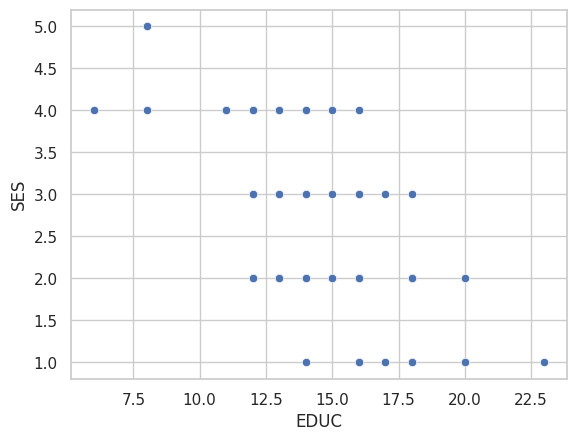

In [16]:
sns.set_style('whitegrid')
sns.scatterplot(data=df, 
                x = 'EDUC', 
                y = df['SES'].dropna(), 
                palette='deep') 


plt.show() 

In [17]:
df.groupby(['EDUC'], as_index=False)['SES'].median().sort_values(by='SES')  

,EDUC,SES
8,17,1.0
10,20,1.0
11,23,1.0
4,13,2.0
6,15,2.0
7,16,2.0
9,18,2.0
3,12,3.0
5,14,3.0
0,6,4.0


In [18]:
df['SES'] = df.groupby(['EDUC'])['SES'].transform(lambda x: x.fillna(x.median())) 

In [19]:
df['SES'].isna().sum() 

0

In [20]:
from scipy.stats import spearmanr
corr, p_value = spearmanr(df['SES'], df['EDUC']) 

print("\n=== Spearman's Rank Correlation Result===\n") 
print(f'Correlation Coefficient: {corr: .3f}') 
print(f'P_value: {p_value: .4f}') 


=== Spearman's Rank Correlation Result===

Correlation Coefficient: -0.728
P_value:  0.0000


## Data Visualization 

In [21]:
columns = ['Age','EDUC', 'MMSE', 'eTIV', 'nWBV', 'ASF'] 

for col in columns: 
    fig = px.box(data_frame=df, 
                 x = 'Group', 
                 y = col,
                 template='plotly_dark',
                 color='Sex', 
                 title = f'{col} for Nondemented vs. Demented')
    fig.update_xaxes(
                    tickvals=[0,1],
                    ticktext=['Nondemented', 'Demented']
                    )
    fig.show() 